In [1]:
# Importing libraries
# Importing data handling libraries

import pandas as pd
import numpy as np
from collections import OrderedDict

# Importing data visulization library
import matplotlib.pyplot as plt
import seaborn as sns

# Importing statistics library
import scipy.stats as scipystats

# Miscelleneous library
import warnings
warnings.filterwarnings('ignore')

#Data preprocessing library
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Train test split the model
from sklearn.model_selection import train_test_split

#accuracy library
from sklearn.metrics import mean_squared_error,r2_score

#model building library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [2]:
df=pd.read_csv("Data.csv")
df2=df.copy()

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.tail()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [5]:
df.shape

(1030, 9)

In [6]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [7]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
def custom_summary(df):
    result=[]
    for i in df:
        stats=OrderedDict({'Feature_name':i,
                          'Datatype':df[i].dtype,
                           'Count':df[i].count(),
                           'Min':df[i].min(),
                           'Quartile1':round(df[i].quantile(0.25),3),
                           'Mean':round(df[i].mean(),3),
                           'Median':round(df[i].median(),3),
                           'Quartile3':round(df[i].quantile(0.75),3),
                           'Max':df[i].max(),
                           'Sta dev':round(df[i].std(),2),
                           'Skewness':round(df[i].skew(),2),
                           'kurtosis':round(df[i].kurt(),2),
                           'Range':df[i].max()-df[i].min(),
                           'IQR':round(df[i].quantile(0.75)-df[i].quantile(0.25),3)   
                          }) 
        result.append(stats)
        #skewness comment
        if df[i].skew()<-1:
            sklabel="High -ve skewed"
        elif -1<df[i].skew()<-0.5:
            sklabel="Moderate -ve skew"
        elif -0.5<df[i].skew()<0:
            sklabel="Low -'ve skewed"
        elif 0<df[i].skew()<0.5:
            sklabel="Low +'ve skewed"
        elif 0.5<df[i].skew()<1:
            sklabel="Moderate +ve skew"
        elif df[i].skew()>1:
            sklabel="Highly +ve skewed"
        else:
            sklabel="Error"
        stats["skewness comment"]=sklabel
        #outlier comment
        upper_limit = stats["Quartile3"]+(1.5*stats['IQR'])
        lower_limit = stats["Quartile1"]-(1.5*stats['IQR'])
        if len([x for x in df[i] if x <lower_limit or x>upper_limit])>0:
            outlier_comment="Has outliers"
        else:
            outlier_comment="No outliers"
        stats["outlier comment"]=outlier_comment
        
    result_df=pd.DataFrame(result)
    return result_df
custom_summary(df)

,Feature_name,Datatype,Count,Min,Quartile1,Mean,Median,Quartile3,Max,Sta dev,Skewness,kurtosis,Range,IQR,skewness comment,outlier comment
0,cement,float64,1030,102.00,192.375,281.168,272.900,350.000,540.0,104.51,0.51,-0.52,438.00,157.625,Moderate +ve skew,No outliers
1,slag,float64,1030,0.00,0.000,73.896,22.000,142.950,359.4,86.28,0.80,-0.51,359.40,142.950,Moderate +ve skew,Has outliers
2,ash,float64,1030,0.00,0.000,54.188,0.000,118.300,200.1,64.00,0.54,-1.33,200.10,118.300,Moderate +ve skew,No outliers
3,water,float64,1030,121.80,164.900,181.567,185.000,192.000,247.0,21.35,0.07,0.12,125.20,27.100,Low +'ve skewed,Has outliers
4,superplastic,float64,1030,0.00,0.000,6.205,6.400,10.200,32.2,5.97,0.91,1.41,32.20,10.200,Moderate +ve skew,Has outliers
5,coarseagg,float64,1030,801.00,932.000,972.919,968.000,1029.400,1145.0,77.75,-0.04,-0.60,344.00,97.400,Low -'ve skewed,No outliers
6,fineagg,float64,1030,594.00,730.950,773.580,779.500,824.000,992.6,80.18,-0.25,-0.10,398.60,93.050,Low -'ve skewed,Has outliers
7,age,int64,1030,1.00,7.000,45.662,28.000,56.000,365.0,63.17,3.27,12.17,364.00,49.000,Highly +ve skewed,Has outliers
8,strength,float64,1030,2.33,23.710,35.818,34.445,46.135,82.6,16.71,0.42,-0.31,80.27,22.425,Low +'ve skewed,Has outliers


## Building ODT plots(Outlier Detection Plots)

In [9]:
def replaceoutlier(df,col,method='quartile', strategy='median'):
    col_data=df[col]
    q1,q2,q3=col_data.quantile([0.25,0.5,0.75])
    col_mean,col_std=col_data.mean(),col_data.std()
    
    # setting outlier boundaries using quartile method 
    if method=='quartile':
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        
    # setting outlier boundaries using standard deviation method
    elif method=='std':
        cutoff=col_std*2
        upper_limit=col_mean+cutoff
        lower_limit=col_mean-cutoff
    else:
        print('Error:please select the correct method')
        
    # printing and replacing outlier
    outliers = df.loc[(col_data<lower_limit) | (col_data>upper_limit),col]
    outlier_density=round(len(outliers)/len(df)*100,2)
    
    if len(outliers)==0:
        print(f'Feature {col} does not have any outliers')
    else:
        print('Total no.of outliers are ',len(outliers))
        print('density of outlier is ', outlier_density)
        print(f'outliers for {col} are: \n {np.sort(np.array(outliers))}\n')
        display(df[(col_data<lower_limit) | (col_data>upper_limit)])
    
    #Replacing outlier with mean or median
    if strategy=="median":
        df.loc[(col_data<lower_limit) | (col_data>upper_limit),col]=q2
    elif strategy=="mean":
        df.loc[(col_data<lower_limit) | (col_data>upper_limit),col]=col_mean
    else:
        print('please select correct strategy')
        
    return df

        

In [32]:
replaceoutlier(df,col,method='quartile', strategy='median')

Total no.of outliers are  5
density of outlier is  0.49
outliers for strength are: 
 [79.3 79.3 79.3 79.3 79.4]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
245,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91.0,79.3
257,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56.0,79.4
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91.0,79.3
733,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91.0,79.3
766,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91.0,79.3


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
1026,531.3,0.0,0.0,141.8,6.4,852.1,893.7,3.0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,28.0,55.06


In [10]:
def odt_plot(df,col):
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
    # Showing Box plots
    ax1.set_title(col + ' box plot')
    ax1.set_xlabel('Box Density')
    ax1.set_ylabel(col +' Values')
    sns.boxplot(df[col],ax=ax1,orient='v',color='red')
    
    
    #plot with outliers
    sns.distplot(df[col],ax=ax2,color='red',fit=scipystats.norm)
    ax2.axvline(df[col].mean(),color='green',linestyle='dashed')
    ax2.axvline(df[col].median(),color='black',linestyle='dashed')
    ax2.set_title(col + ' histogram with outliers')
    ax2.set_xlabel('Density')
    ax2.set_ylabel(col +' Values')
    
    
    y=replaceoutlier(df,col)
    sns.distplot(y[col],ax=ax3,color='red',fit=scipystats.norm)
    ax3.axvline(y[col].mean(),color='green',linestyle='dashed')
    ax3.axvline(y[col].median(),color='black',linestyle='dashed')
    ax3.set_title(col + ' histogram without outliers')
    ax3.set_xlabel('Density')
    ax3.set_ylabel(col +' Values')
    
    plt.show()
    
    

Feature cement does not have any outliers


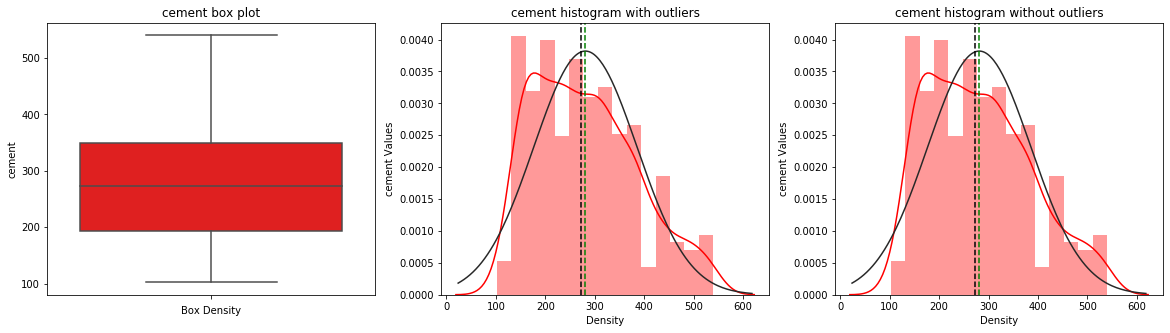

Total no.of outliers are  2
density of outlier is  0.19
outliers for slag are: 
 [359.4 359.4]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


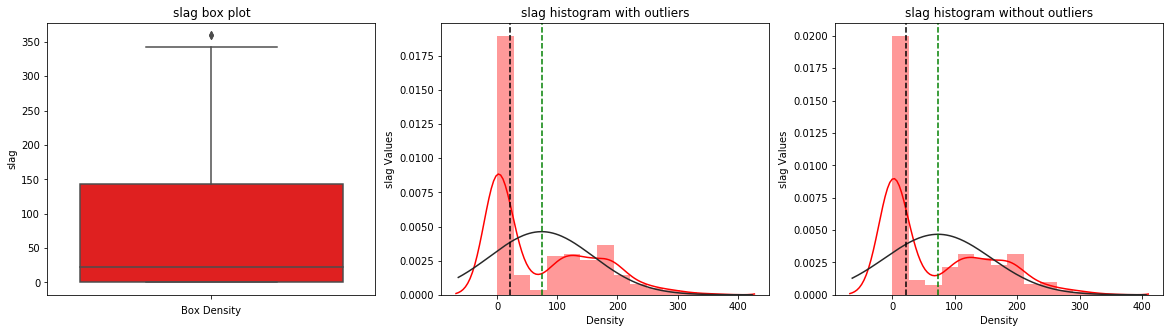

Feature ash does not have any outliers


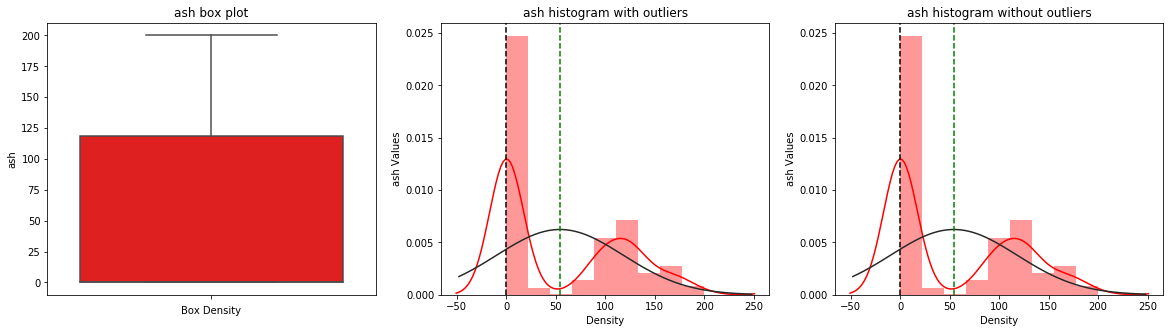

Total no.of outliers are  9
density of outlier is  0.87
outliers for water are: 
 [121.8 121.8 121.8 121.8 121.8 236.7 237.  246.9 247. ]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


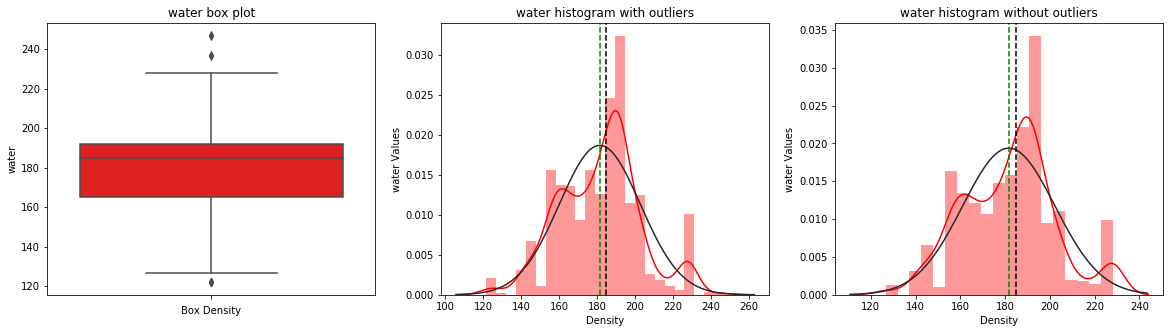

Total no.of outliers are  10
density of outlier is  0.97
outliers for superplastic are: 
 [28.2 28.2 28.2 28.2 28.2 32.2 32.2 32.2 32.2 32.2]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


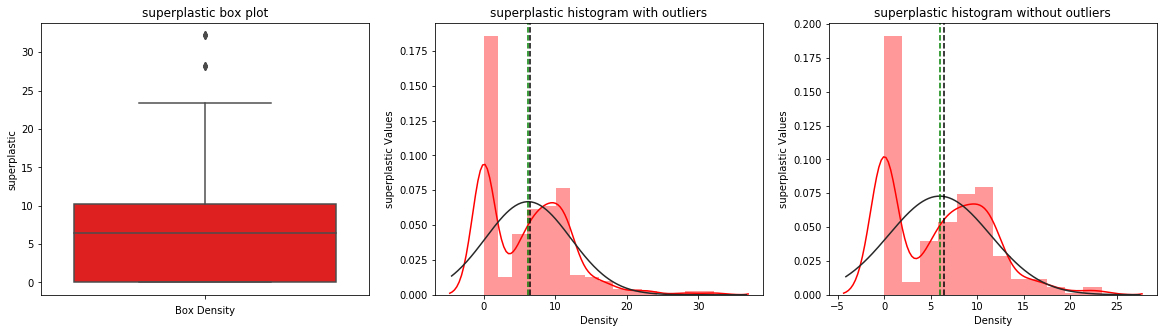

Feature coarseagg does not have any outliers


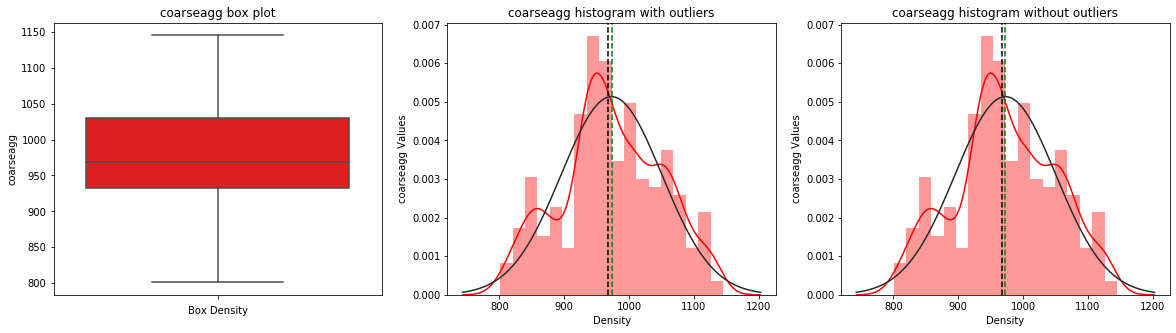

Total no.of outliers are  5
density of outlier is  0.49
outliers for fineagg are: 
 [992.6 992.6 992.6 992.6 992.6]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


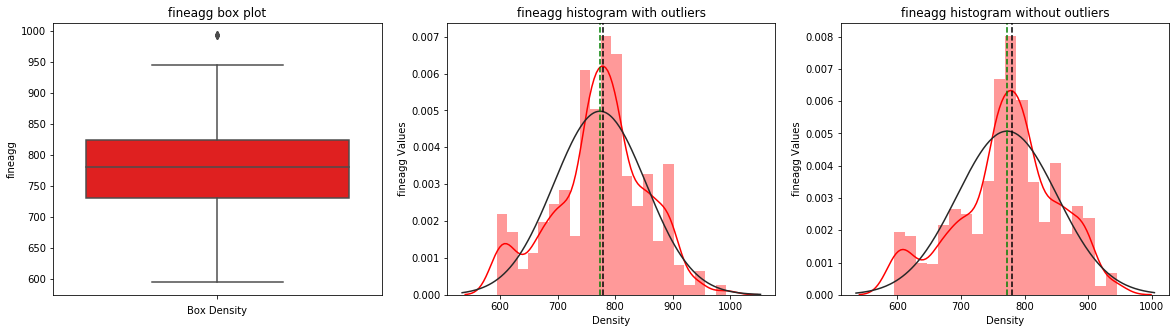

Total no.of outliers are  59
density of outlier is  5.73
outliers for age are: 
 [180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 270 270 270 270 270 270 270 270 270 270
 270 270 270 360 360 360 360 360 360 365 365 365 365 365 365 365 365 365
 365 365 365 365 365]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


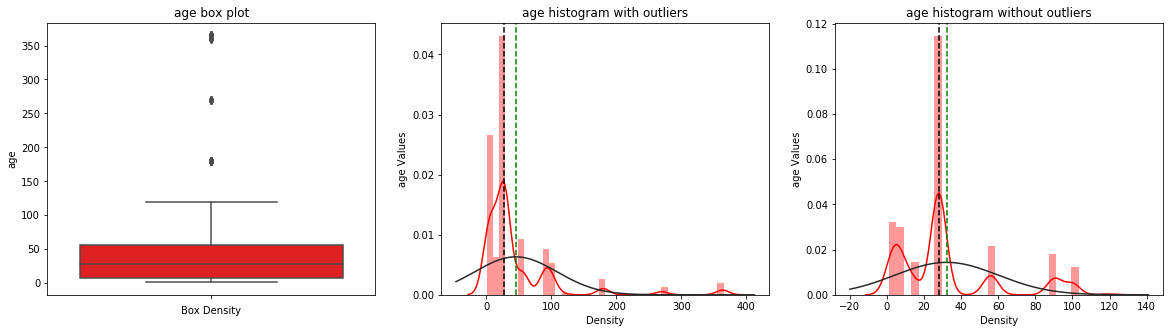

Total no.of outliers are  4
density of outlier is  0.39
outliers for strength are: 
 [79.99 80.2  81.75 82.6 ]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28.0,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91.0,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56.0,80.20


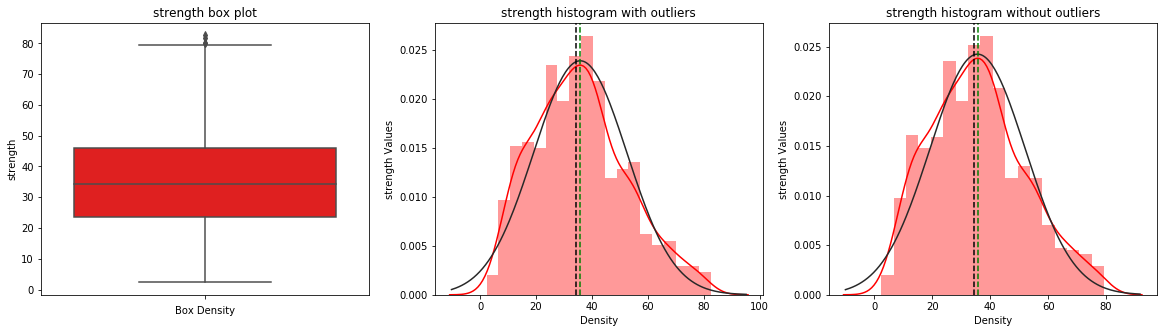

In [11]:
for col in df.columns.to_list():
    odt_plot(df,col)

In [12]:
custom_summary(df)

,Feature_name,Datatype,Count,Min,Quartile1,Mean,Median,Quartile3,Max,Sta dev,Skewness,kurtosis,Range,IQR,skewness comment,outlier comment
0,cement,float64,1030,102.00,192.375,281.168,272.900,350.000,540.0,104.51,0.51,-0.52,438.00,157.625,Moderate +ve skew,No outliers
1,slag,float64,1030,0.00,0.000,73.241,22.000,142.725,342.1,85.38,0.78,-0.62,342.10,142.725,Moderate +ve skew,No outliers
2,ash,float64,1030,0.00,0.000,54.188,0.000,118.300,200.1,64.00,0.54,-1.33,200.10,118.300,Moderate +ve skew,No outliers
3,water,float64,1030,126.60,164.900,181.653,185.000,192.000,228.0,20.60,0.09,-0.04,101.40,27.100,Low +'ve skewed,No outliers
4,superplastic,float64,1030,0.00,0.000,5.974,6.400,10.075,23.4,5.48,0.47,-0.44,23.40,10.075,Low +'ve skewed,No outliers
5,coarseagg,float64,1030,801.00,932.000,972.919,968.000,1029.400,1145.0,77.75,-0.04,-0.60,344.00,97.400,Low -'ve skewed,No outliers
6,fineagg,float64,1030,594.00,730.950,772.546,779.400,822.200,945.0,78.70,-0.33,-0.19,351.00,91.250,Low -'ve skewed,Has outliers
7,age,float64,1030,1.00,7.000,32.256,28.000,28.000,120.0,27.80,1.29,0.79,119.00,21.000,Highly +ve skewed,Has outliers
8,strength,float64,1030,2.33,23.710,35.637,34.422,45.808,79.4,16.46,0.39,-0.36,77.07,22.098,Low +'ve skewed,Has outliers


# Feature Interaction

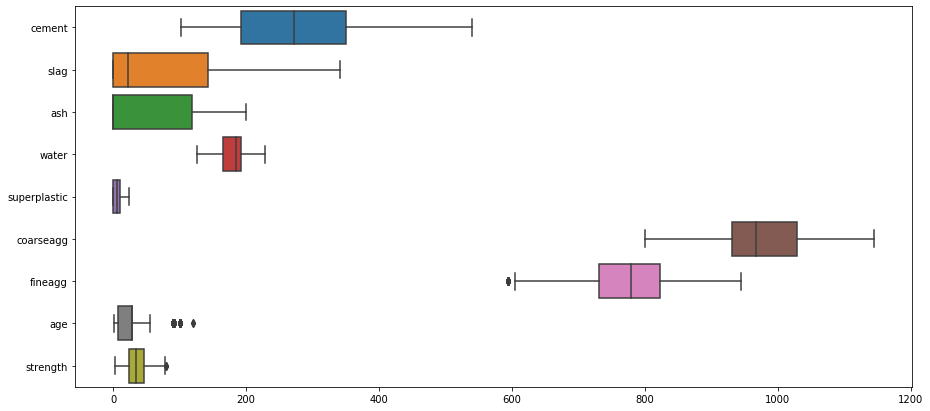

In [13]:
fig=plt.figure(figsize=(15,7))
ax=sns.boxplot(data=df,orient='h')

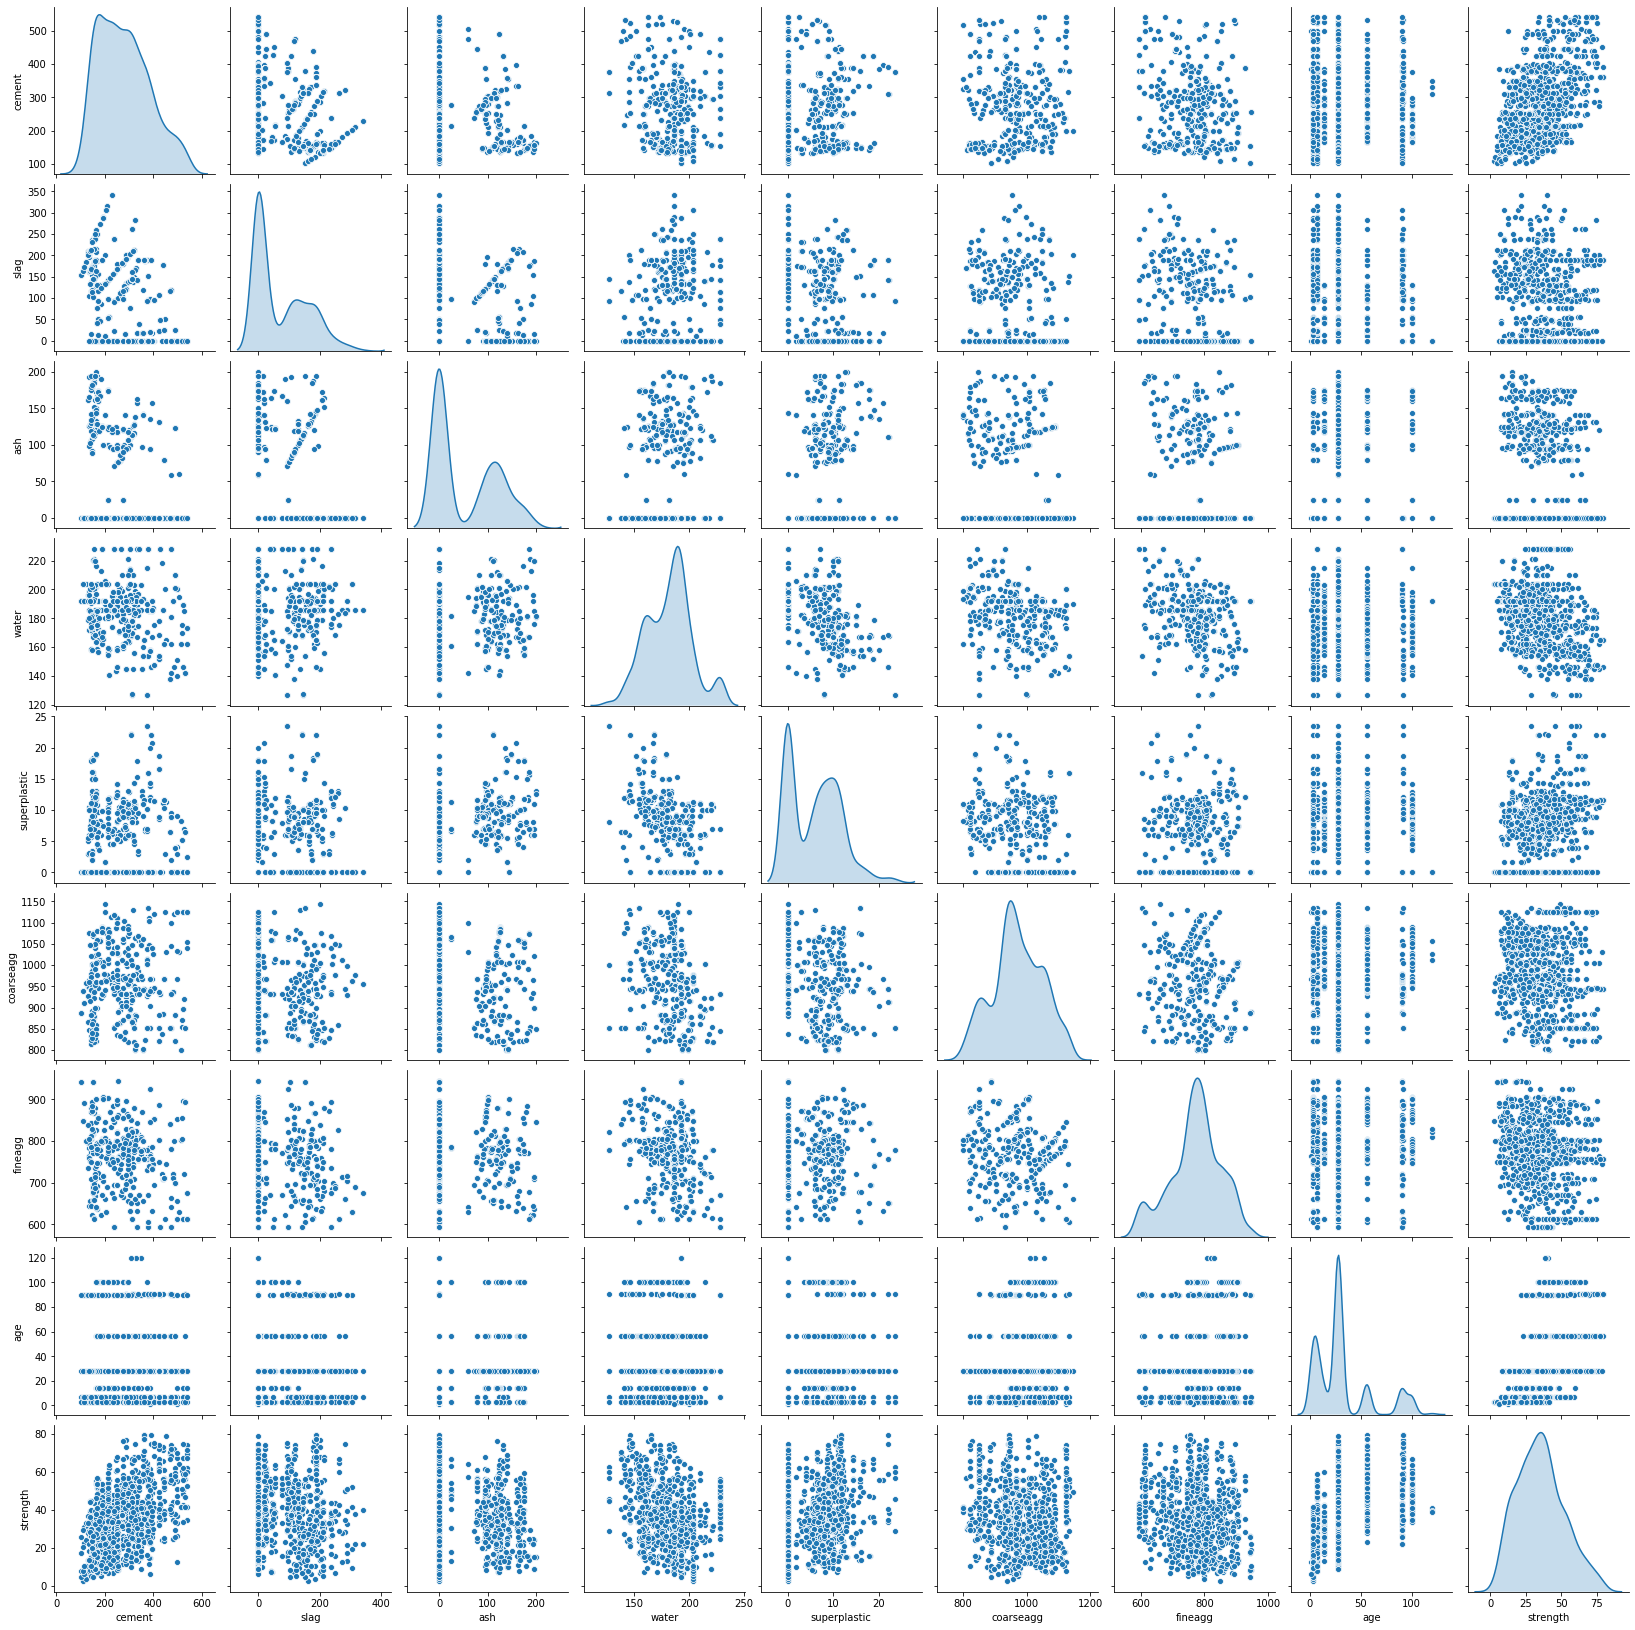

In [14]:
sns.pairplot(df,diag_kind='kde')

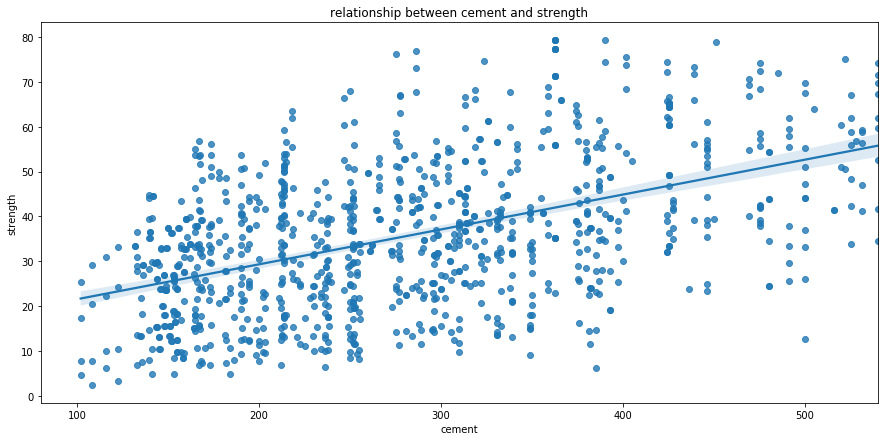

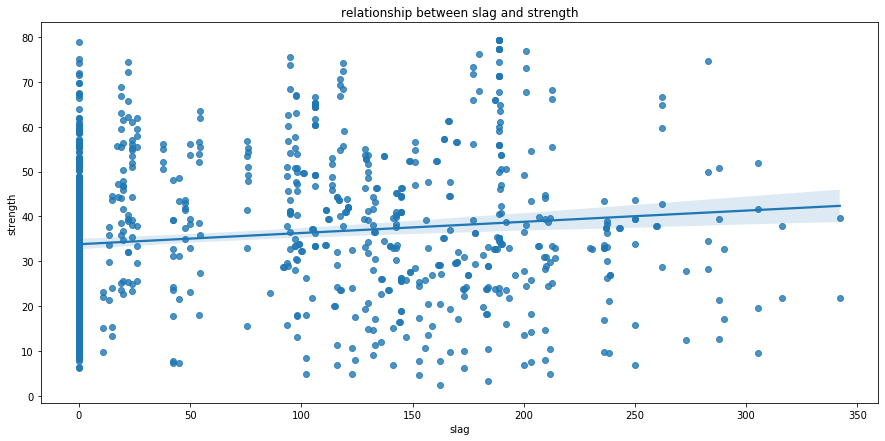

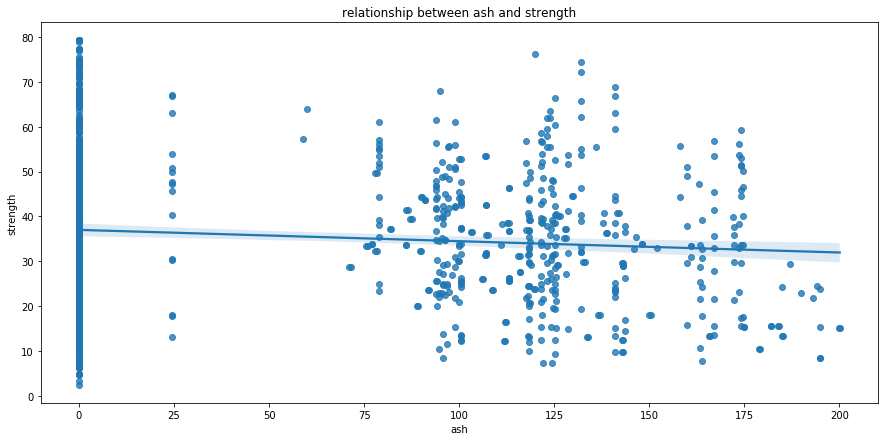

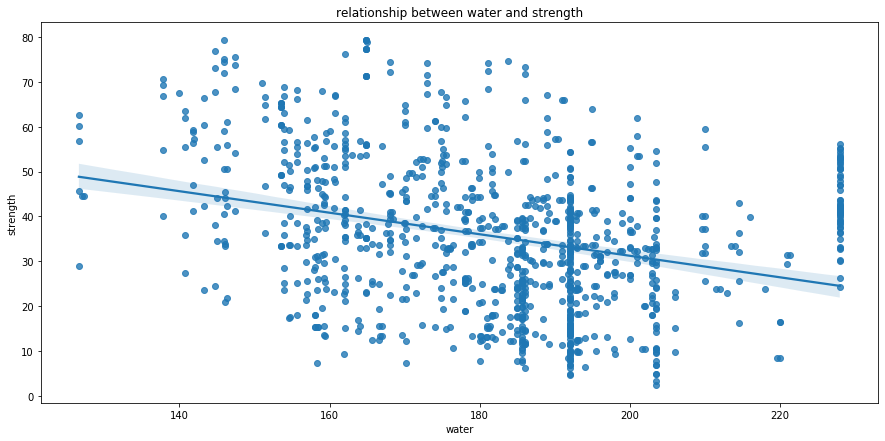

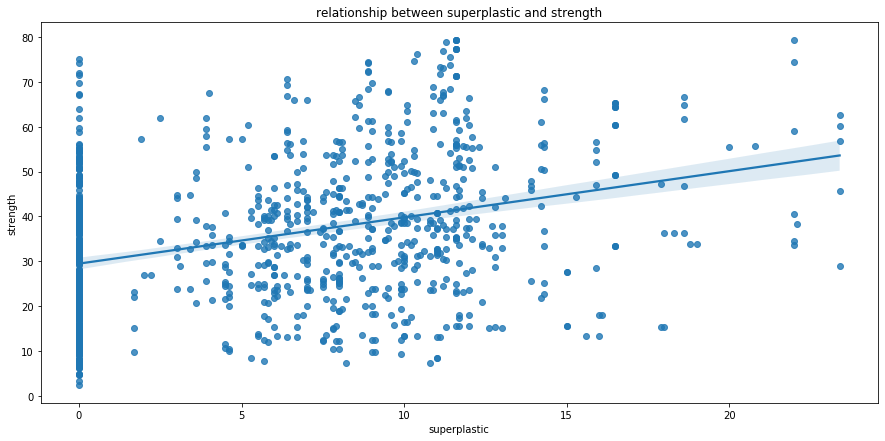

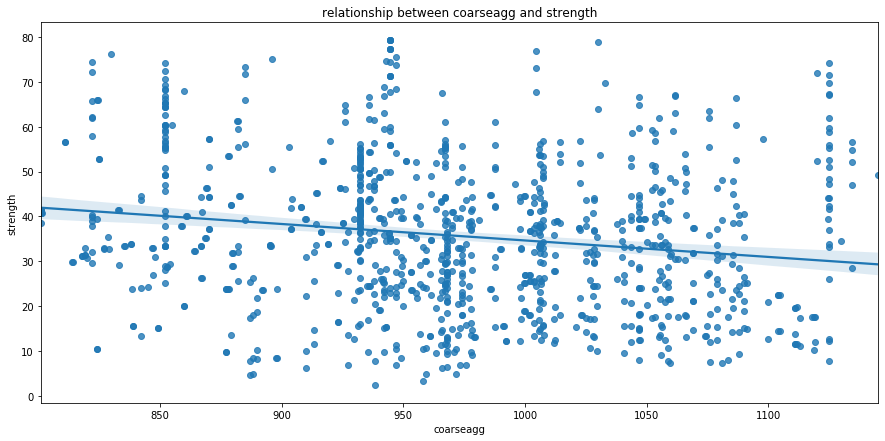

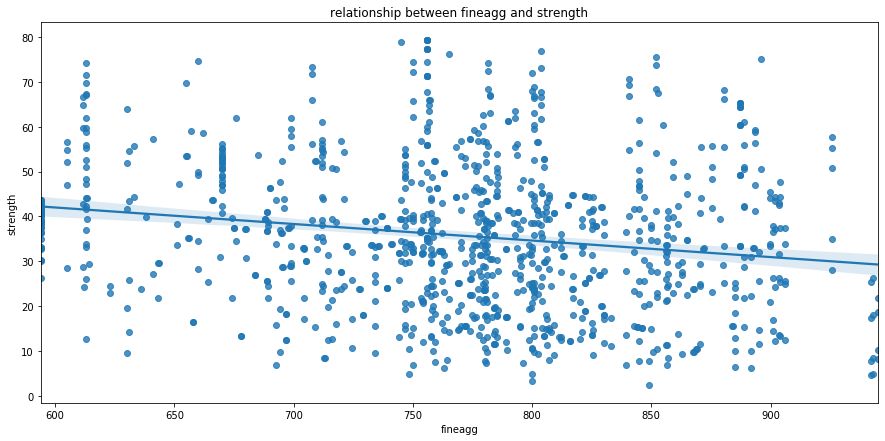

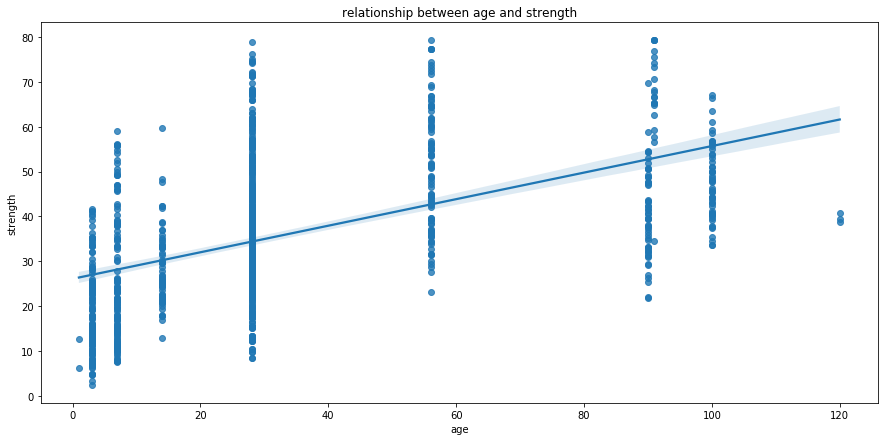

In [15]:
# multivariate analysis
for col in list(df.columns):
    if col != 'strength':
        fig,ax1=plt.subplots(figsize=(15,7),sharex=False)
        sns.regplot(x=df[col],y=df['strength'],ax=ax1).set_title(f'relationship between {col} and strength')

# Checking for multi-colinearity

# 1) Correlation Matrix
# 2)Variance Inflation index

In [16]:
# Correlation matrix
cormat=df.corr()

In [17]:
cormat

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275046,-0.397467,-0.091614,0.013336,-0.109349,-0.238698,-0.031962,0.493518
slag,-0.275046,1.000000,-0.320468,0.098880,0.061195,-0.283882,-0.282383,-0.028971,0.129561
ash,-0.397467,-0.320468,1.000000,-0.248011,0.447492,-0.009961,0.091729,0.057928,-0.097973
water,-0.091614,0.098880,-0.248011,1.000000,-0.658056,-0.156928,-0.426299,-0.040304,-0.300043
superplastic,0.013336,0.061195,0.447492,-0.658056,1.000000,-0.224503,0.156591,0.062013,0.342633
coarseagg,-0.109349,-0.283882,-0.009961,-0.156928,-0.224503,1.000000,-0.161377,0.018078,-0.173234
fineagg,-0.238698,-0.282383,0.091729,-0.426299,0.156591,-0.161377,1.000000,0.051532,-0.176113
age,-0.031962,-0.028971,0.057928,-0.040304,0.062013,0.018078,0.051532,1.000000,0.499711
strength,0.493518,0.129561,-0.097973,-0.300043,0.342633,-0.173234,-0.176113,0.499711,1.000000


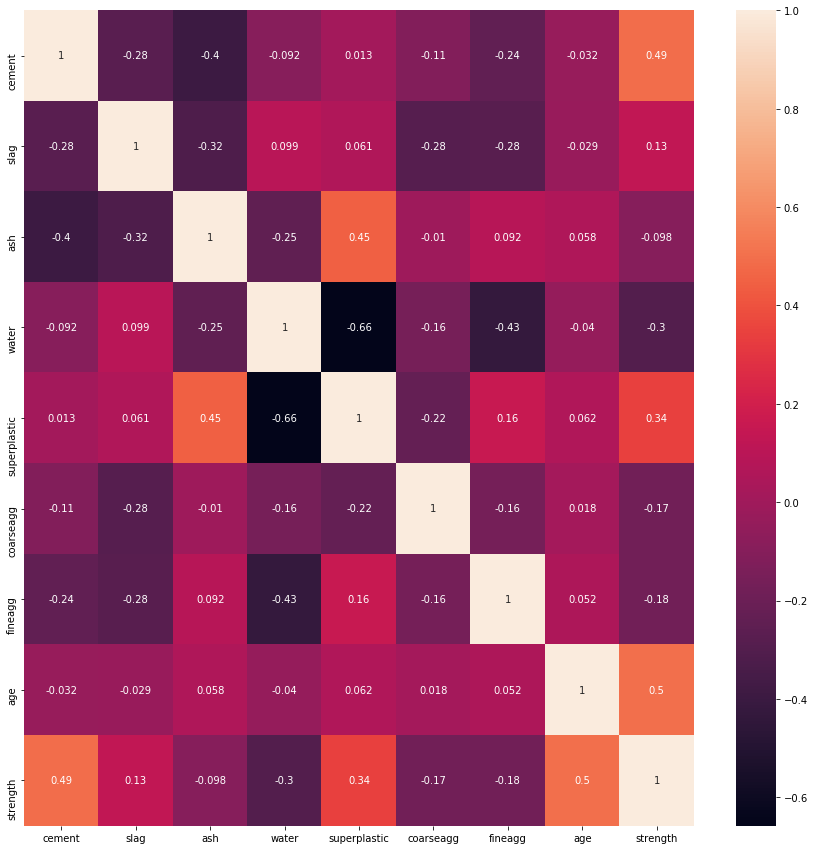

In [18]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(cormat,annot=True)

In [19]:
#Variance Inflation index
def vifcolinerity(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=pd.DataFrame()
    vif["viffactor"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    vif["feature"]=x.columns
    return vif.sort_values(by='viffactor',ascending=False).round(1)

In [20]:
vifcolinerity(df.drop('strength',axis=1))

,viffactor,feature
5,86.9,coarseagg
3,82.0,water
6,68.7,fineagg
0,14.3,cement
4,5.7,superplastic
2,4.4,ash
1,3.3,slag
7,2.4,age


# Performing PCA

In [21]:
def applypca(x):
    n_components=len(x.columns)
    x=StandardScaler().fit_transform(x)
    
    #Applying PCA
    for j in range(1,n_components):
        pca=PCA(n_components=j)
        pcom=pca.fit_transform(x)
        expvarobj=np.cumsum(pca.explained_variance_ratio_)
        if expvarobj[j-1]>=0.9:
            n_components=j
            break

    print("explained_variance_ratio after PCA is",expvarobj)

    #creating Datafram for PCA components
    cols=[]
    for i in range(1,n_components+1):
        cols.append("PC"+str(i))
    
    #changing into DataFrame
    p_components=pd.DataFrame(data=pcom,columns=cols)

    return p_components

In [22]:
p_comp=applypca(df.drop('strength',axis=1))

explained_variance_ratio after PCA is [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [23]:
vifcolinerity(p_comp)

,viffactor,feature
1,1.0,PC2
4,1.0,PC5
2,1.0,PC3
0,1.0,PC1
3,1.0,PC4
5,1.0,PC6


In [24]:
#concatinating data for model building
y=df[['strength']]


In [25]:
y.head()

,strength
0,29.89
1,23.51
2,29.22
3,45.85
4,18.29


In [26]:
def traintestsplit(x,tcol,test_size=0.3):
    return train_test_split(df,tcol,test_size=test_size,random_state=200)

In [27]:
#Building the model
def modelbuilding(model_name,model,x,tcol,testsize=0.3):
    x_train,x_test,y_train,y_test=traintestsplit(x,tcol)
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,ypred))
    li=[model_name,r2_score(y_test,ypred),rmse]
    return li

In [28]:
lr=LinearRegression()
lso=Lasso()
rid=Ridge()
dt=DecisionTreeRegressor()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
xgb=XGBRegressor()
svm=SVR()

In [29]:
#Model building
def fitmodels(p_comp,y,test_size=0.3):
    col_names=['modelname','r2_score','rmse']
    result=pd.DataFrame(columns=col_names)
    result.loc[len(result)]=modelbuilding('linear_regression',lr,p_comp,y)
    result.loc[len(result)]=modelbuilding('lasso_regression',lso,p_comp,y)
    result.loc[len(result)]=modelbuilding('ridge_regression',rid,p_comp,y)
    result.loc[len(result)]=modelbuilding('DecisionTreeRegression',dt,p_comp,y)
    result.loc[len(result)]=modelbuilding('KNeighborsRegression',knn,p_comp,y)
    result.loc[len(result)]=modelbuilding('RandomForestRegression',rf,p_comp,y)
    result.loc[len(result)]=modelbuilding('AdaBoostRegression',ab,p_comp,y)
    result.loc[len(result)]=modelbuilding('GradientBoostingRegression',gb,p_comp,y)
    result.loc[len(result)]=modelbuilding('XGBRegressor',xgb,p_comp,y)
    result.loc[len(result)]=modelbuilding('SVR',svm,p_comp,y)
    return result

In [30]:
#Getting outputs
Final_output=fitmodels(p_comp,y)
print(Final_output)

                    modelname  r2_score          rmse
0           linear_regression  1.000000  2.465657e-14
1            lasso_regression  0.999982  6.844282e-02
2            ridge_regression  1.000000  1.734298e-04
3      DecisionTreeRegression  0.999727  2.690030e-01
4        KNeighborsRegression  0.693410  9.018796e+00
5      RandomForestRegression  0.999947  1.185000e-01
6          AdaBoostRegression  0.997111  8.754746e-01
7  GradientBoostingRegression  0.999893  1.685027e-01
8                XGBRegressor  0.999513  3.595447e-01
9                         SVR  0.224811  1.434080e+01


In [31]:
Final_output = pd.DataFrame(Final_output)
Final_output.columns = ['modelname','r2_score','rmse']
Final_output

,modelname,r2_score,rmse
0,linear_regression,1.000000,2.465657e-14
1,lasso_regression,0.999982,6.844282e-02
2,ridge_regression,1.000000,1.734298e-04
3,DecisionTreeRegression,0.999727,2.690030e-01
4,KNeighborsRegression,0.693410,9.018796e+00
5,RandomForestRegression,0.999947,1.185000e-01
6,AdaBoostRegression,0.997111,8.754746e-01
7,GradientBoostingRegression,0.999893,1.685027e-01
8,XGBRegressor,0.999513,3.595447e-01
9,SVR,0.224811,1.434080e+01
